In [42]:
!pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import gensim
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import re 

In [45]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gorantla.krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gorantla.krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
corpus = [
    "My name is sudhanshu kumar.",
    "I use to teach all the data stack along with Ops and cloud !",
    "Nlp is very very amazing",
    "We are trying to learn Word2vec",
    "We will try to build two models for word2vec CBOW and skip-gram"
    "Natural language processing is part of AI.",
    "My phone number is 74634",
    "Word2vec is being used for the word embeddings",

]



In [47]:
def word_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+',"",text)
    text = text.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(text)
    word = [i for i in word if i not in stopwords.words("english")]
    return word 



In [48]:
processed_corpus = [word_preprocessing(sentence) for sentence in corpus]


In [49]:
processed_corpus

[['name', 'sudhanshu', 'kumar'],
 ['use', 'teach', 'data', 'stack', 'along', 'ops', 'cloud'],
 ['nlp', 'amazing'],
 ['trying', 'learn', 'wordvec'],
 ['try',
  'build',
  'two',
  'models',
  'wordvec',
  'cbow',
  'skipgramnatural',
  'language',
  'processing',
  'part',
  'ai'],
 ['phone', 'number'],
 ['wordvec', 'used', 'word', 'embeddings']]

In [50]:
word2vec_cbow = Word2Vec(sentences=processed_corpus,vector_size=100,window=5,min_count=1,sg=0)
word2vec_sg = Word2Vec(sentences=processed_corpus,vector_size=100,window=5,min_count=1,sg=1)

In [51]:
word2vec_cbow

In [52]:
word2vec_sg.wv['sudhanshu']

array([ 9.2049537e-05,  3.0789657e-03, -6.8130936e-03, -1.3770603e-03,
        7.6694051e-03,  7.3461924e-03, -3.6735781e-03,  2.6438553e-03,
       -8.3174938e-03,  6.2045138e-03, -4.6364213e-03, -3.1637731e-03,
        9.3133599e-03,  8.7211747e-04,  7.4949088e-03, -6.0750670e-03,
        5.1640323e-03,  9.9217929e-03, -8.4586060e-03, -5.1345965e-03,
       -7.0647183e-03, -4.8639565e-03, -3.7761584e-03, -8.5367290e-03,
        7.9541095e-03, -4.8434488e-03,  8.4257908e-03,  5.2650212e-03,
       -6.5494534e-03,  3.9584367e-03,  5.4718135e-03, -7.4277967e-03,
       -7.4088452e-03, -2.4761455e-03, -8.6262273e-03, -1.5815721e-03,
       -4.0155341e-04,  3.2990421e-03,  1.4396025e-03, -8.7808364e-04,
       -5.5933860e-03,  1.7328055e-03, -8.9520431e-04,  6.7926934e-03,
        3.9757444e-03,  4.5307223e-03,  1.4354242e-03, -2.6998974e-03,
       -4.3684910e-03, -1.0327508e-03,  1.4383747e-03, -2.6453969e-03,
       -7.0758117e-03, -7.8075523e-03, -9.1247652e-03, -5.9355521e-03,
      

In [53]:
word2vec_sg.wv.most_similar("sudhanshu",topn=3)

[('along', 0.19913709163665771),
 ('nlp', 0.1727299690246582),
 ('name', 0.17114832997322083)]

In [54]:
word2vec_cbow.wv.similarity("nlp","ai")

0.040243704

In [55]:
word2vec_cbow.wv.index_to_key

['wordvec',
 'word',
 'sudhanshu',
 'kumar',
 'use',
 'teach',
 'data',
 'stack',
 'along',
 'ops',
 'cloud',
 'nlp',
 'amazing',
 'trying',
 'learn',
 'embeddings',
 'try',
 'build',
 'two',
 'models',
 'cbow',
 'skipgramnatural',
 'language',
 'processing',
 'part',
 'ai',
 'phone',
 'number',
 'used',
 'name']

In [56]:
word2vec_cbow.wv.most_similar("sudhanshu",topn=5)

[('along', 0.19913624227046967),
 ('nlp', 0.17274262011051178),
 ('name', 0.1711503118276596),
 ('use', 0.17017261683940887),
 ('two', 0.15280553698539734)]

In [57]:
word2vec_sg.wv.most_similar("sudhanshu",topn=5)

[('along', 0.19913709163665771),
 ('nlp', 0.1727299690246582),
 ('name', 0.17114832997322083),
 ('use', 0.1701723337173462),
 ('two', 0.1528129130601883)]

In [58]:
from sklearn.manifold import TSNE
import numpy as np



In [59]:
word_vectors = word2vec_cbow.wv 
vocab = word_vectors.index_to_key

In [60]:
len(vocab)

30

In [61]:
x = np.array([word_vectors[i] for i in vocab])

In [64]:
tsne = TSNE(n_components=2,perplexity=1)

In [66]:
x_new_embeddings = tsne.fit_transform(x)

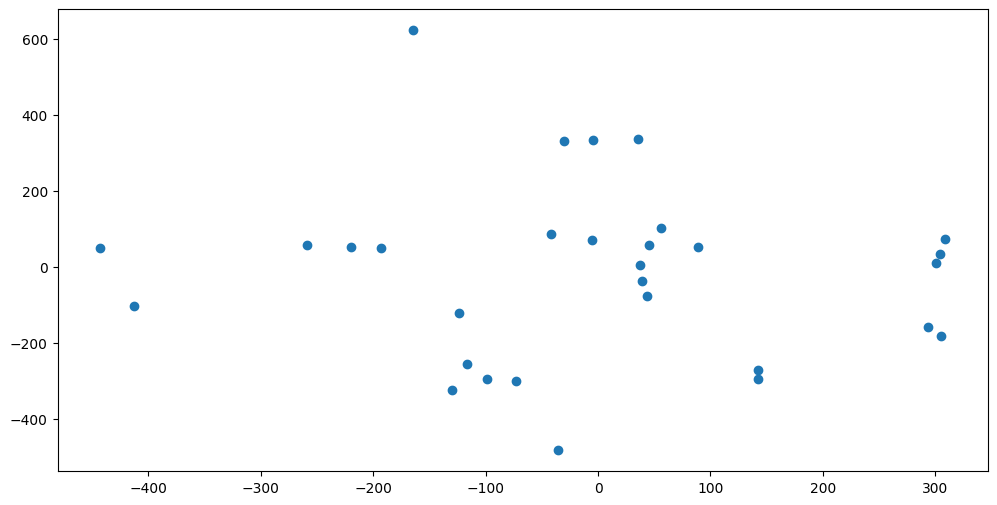

In [67]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[:,0],x_new_embeddings[:,1],marker='o')

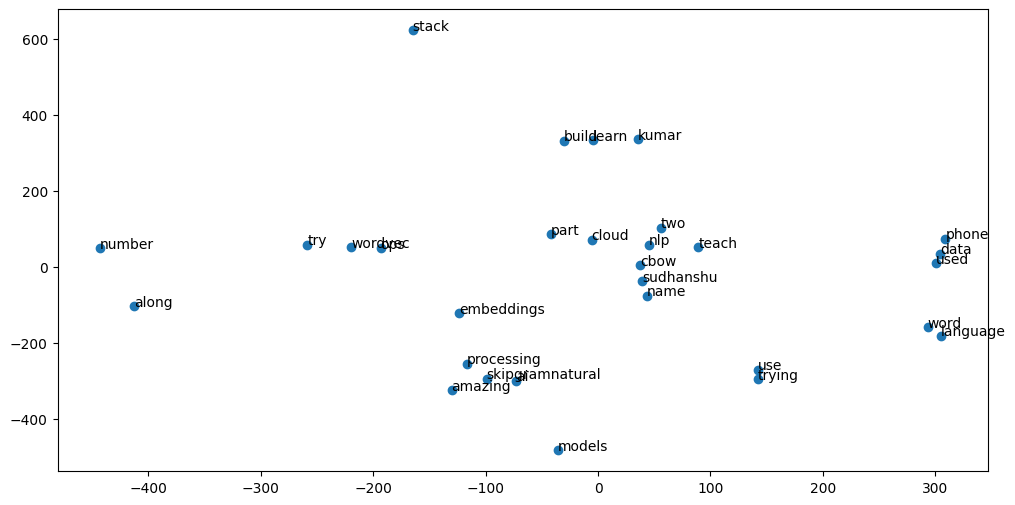

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[:,0],x_new_embeddings[:,1],marker='o')

for i,words in enumerate(vocab[:len(x_new_embeddings)]):
    plt.annotate(words,xy=(x_new_embeddings[i,0],x_new_embeddings[i,1]))